# Gradient Descent with Logistic Regression  - Example 3

## Predicting admission to graduate school

Now, let us put the gradient to work. We will use gradient descent to implement logistic regression in order to solve a classification problem.

### Data Description

Our mission is to create a model that will estimate the probability of being admitted to a graduate program based on GRE scores and GPA.  We have a list of scores for $N$ students (the inputs, ${\bf x}^{i}$), and we know whether or not they were admitted (the outputs, $y^{i}$, where a value of "1" means "admitted", and "0" means "not admitted").

The data has three columns, where the first column consists of the outputs $y^{i}$ and the following columns consist of the inputs, ${\bf x}^{i}$.  The second column gives all GRE test scores, and the third column contains the GPA.
Before using Gradient Descent, we will plot the data using different symbols to represent the two classes.

In [ ]:
#------------------------
# Import packages
#------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import norm

# Plot style
plt.style.use('seaborn-whitegrid')

#------------------------
# Make dataframe
#------------------------

# Creates a dataframe from file called Admission-Data-Rank.csv
#------------------------
url = 'https://raw.githubusercontent.com/cedholm/Gradient-descent-methods-in-machine-learning/main/Lesson_4/Admission-Data-Rank.csv'
dfAdmissions = pd.read_csv(url)

# Print out info on datasets
#------------------------

# Prints first 5 lines of data
print(dfAdmissions.head(5))

# Print basic stats on data
print(dfAdmissions.describe())

   admit  gre   gpa
0      1  800  4.00
1      1  560  2.98
2      0  440  3.22
3      1  760  4.00
4      1  700  4.00
           admit         gre        gpa
count  61.000000   61.000000  61.000000
mean    0.540984  611.803279   3.453115
std     0.502453  120.242924   0.390698
min     0.000000  340.000000   2.420000
25%     0.000000  540.000000   3.200000
50%     1.000000  600.000000   3.530000
75%     1.000000  700.000000   3.730000
max     1.000000  800.000000   4.000000


### Plot the data

Before using Gradient Descent, we will plot the data using different colors to represent the two classes.

Load the data onto your workspace, and generate a scatter plot of the second column (GRE) against the third column (GPA) using a one color if they were admitted (if there is a 1 in the first column) and a different color if they were not admitted (if there is a 0 in the first column).

Your plot should look like the following:

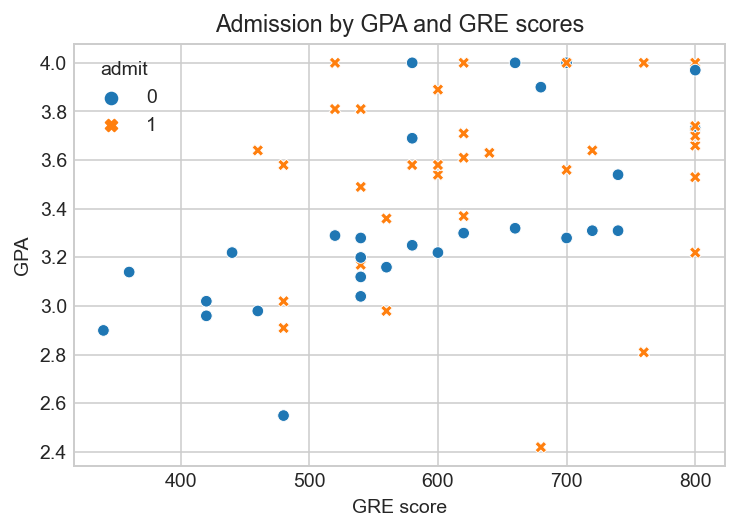

In [ ]:
#------------------------
# Create plot
#------------------------

# Make figure size
fig = plt.figure(dpi = 140)

# Plot df data
#------------------------
sns.scatterplot(data = dfAdmissions, x = 'gre', y = 'gpa', hue = 'admit', style = "admit")

# Label figure
plt.xlabel('GRE score')
plt.ylabel('GPA')
plt.title('Admission by GPA and GRE scores')

# Uncommment to save figure
#------------------------
plt.savefig('admission.pdf', bbox_inches='tight', dpi= 300)

# Show the plot
#------------------------
plt.show()

### The minimization problem

We want to maximize the log likelihood function, so the cost function that we want to *minimize* is the negative of the log likelihood.

The update rule is
$$
\boldsymbol{\theta}^{(t+1)}=\boldsymbol{\theta}^{(t)}-\gamma^{(t)}  \nabla (- \ell) =\boldsymbol{\theta}^{(t)}+\gamma^{(t)}  \nabla \ell
$$

Note that, in the code, we are writing $\boldsymbol{\theta}$, the gradient vector $\nabla \ell$, and the input vector ${\bf x}^{(i)}$, as *column* vectors.

We note that since $\nabla \ell$ involves a sum, a large data set could result in large values of the partial derivatives.  To control the size of these entries, it is often helpful to use the *mean* log likelihood, ie. $\frac{1}{N} \nabla \ell$. This is what we recommend for this example.

### Implementation

1. Let $N$ be the number of students in the dataset. Define ${\bf y}$ as the first column of the data matrix, which is an $N \times 1$ column vector of 0's and 1's giving the admission data.  Define $x_1$ to be the data column of GRE values and $x_2$ to be the data column of GPA values.

In [ ]:
# Name the data
#------------------------
y = dfAdmissions['admit'].values
x1 = dfAdmissions['gre'].values
x2 = dfAdmissions['gpa'].values

# Number of entries in dataset
#------------------------
N = len(y)

2. Normalize each column of this input matrix (this helps the algorithm converge). One way to make the inputs more or less the same size is to subtract the mean of each column, and then divide by the standard deviation of each column:

    $$x_i \mapsto \frac{x_i - \bar{x}_i}{\sigma_i}$$
    
    where $\bar{x}_i$ is the mean of the $x_i$s, and $\sigma_i$ is the standard error of the $x_i$s.
    
    Define ${\bf X}$ as the $N \times 2$ matrix consisting of the normalized $x_1$ and $x_2$ data columns.


In [ ]:
# Normalize data
#------------------------
normalized_x1 = (x1-np.mean(x1))/np.std(x1)
normalized_x2 = (x2-np.mean(x2))/np.std(x2)

# Data to import into functions
#------------------------
X = np.column_stack((normalized_x1,normalized_x2)) # our normalized x_1 and x_2 data in matrix form X=[x_1 x_2]

3. Initialize the algorithm: Start with a value of $\boldsymbol{\theta}^0$ (one common choice for $\boldsymbol{\theta}^0$ is the zero vector), and set the number of iterations to 0. Fix the rate parameter, $\gamma$, typically $\gamma = 0.01$, the maximum number of iterations, and the convergence threshold, $\epsilon$.  We used $\epsilon = 10^{-6}$. In this example, we write $\boldsymbol{\theta}^0$ as a $1 \times 3$ row vector.


In [ ]:
# Parameters
#------------------------

# Starting point
Theta = [0,0,0]

# Step size to move along gradient
gamma = 0.01

# initialize num of steps to take
totalNumSteps = 0
# create a max number of steps to take
maxSteps = 200000
# how close we want to be to f
tolerance = 0.000001
# initial difference between old and new theta values
diff = 100

4. **Main Loop:**

For each value of the parameter vector, $\boldsymbol{\theta}$:
- Calculate the $N \times 1$ vector of probabilities:
    $$p({\bf X}, \boldsymbol{\theta}) = \dfrac{1}{1 + e^{-{\bf X} * \boldsymbol{\theta}}}.$$
- The $1 \times 3$ gradient vector can be compactly calculated as:
    $$ \nabla \ell = \Big({{\bf y} -{ p}({\bf X}, \boldsymbol{\theta})}\Big)^T* {\bf X}. $$
- The next value of theta is calculated:
    $ \boldsymbol{\theta}^{t+1} = \boldsymbol{\theta}^t + \frac{1}{N} \gamma \nabla \ell .$
- Increment the number of iterations.
- Test for convergence.

Continue until the algorithm has converged (the values of $\boldsymbol{\theta}$ change by less than some threshold amount, e.g., continue until $||\boldsymbol{\theta}^{t+1} - \boldsymbol{\theta}^t|| < 10^{-6} $), or the maximum number of iterations has been reached.

In [ ]:
#------------------------
# Create gradient function
#------------------------

# Create the gradient vector
#------------------------
def gradf(X,y, Theta):

    # Create Xtilde = column of ones merged with X
    N = len(y)
    X0 = np.ones((N,1))
    # Add column of ones to create matrix Xtilde
    Xtilde = np.column_stack((X0, X))

    # Compute scores via dot product
    scores = Xtilde@Theta # Nx1 vector

    # Compute probability function
    predictions = 1 / (1 + np.exp(-scores)) # Nx1

    # Compute gradient via dot product
    gradient = (y-predictions)@Xtilde # 1x3
    return gradient

#------------------------
# Gradient descent calcs
#------------------------

while((totalNumSteps < maxSteps)&(diff > tolerance)):

    # Calculate new (x,y) values - move along gradient to new (x,y) position
    newTheta = Theta + 1/N*gamma*gradf(X,y,Theta)

    # Calculate the difference between current and new (x,y) values
    diff = norm(newTheta-Theta,2)

    # Reassign current (x,y) to new (x,y)
    Theta = newTheta

    # Add 1 to counter for total number of steps
    totalNumSteps += 1

# Get thetas
#------------------------
scaled_theta0 = Theta[0]
scaled_theta1 = Theta[1]
scaled_theta2 = Theta[2]

print('After', totalNumSteps,'timesteps, the SCALED thetas for our logistic regression model are:\nscaled_theta0 =', scaled_theta0)
print('scaled_theta1 =', scaled_theta1)
print('scaled_theta2 =', scaled_theta2)

After 3555 timesteps, the SCALED thetas for our logistic regression model are:
scaled_theta0 = 0.17464557452333884
scaled_theta1 = 0.2976022372910966
scaled_theta2 = 0.41186381993573395


Once the algorithm has converged, use your value of $\boldsymbol{\theta}$ to draw the line that best separates the admitted points from the non-admitted points.  

- If you normalized the input vectors initially, you should convert back to the original variables by transforming the estimated values of $\boldsymbol{\theta}$:

\begin{equation}
\theta_0 + \theta_1 \frac{x_1 - \bar{x}_1}{\sigma_1} + \theta_2 \frac{x_2 - \bar{x}_2}{\sigma_2} =
\Big({\theta_0 - \frac{\theta_1}{\bar{x}_1}{\sigma_1} - \frac{\theta_2}{\bar{x}_2}{\sigma_2}}\Big)  + \frac{\theta_1}{\sigma_1}x_1 + \frac{\theta_2}{\sigma_2}x_2
= \hat{\theta_0} + \hat{\theta_1} x_1 + \hat{\theta_2} x_2
\end{equation}

and use these transformed values, $\hat{\theta}_0$, $\hat{\theta}_1$, $\hat{\theta}_2$ in what follows in lieu of
${\theta}_0$, ${\theta}_1$, ${\theta}_2$.

In [ ]:
# Calculuate unscaled thetas
#------------------------
theta0 = scaled_theta0 - scaled_theta1*np.mean(x1)/(np.std(x1)) - scaled_theta2*np.mean(x2)/(np.std(x2))
theta1 = scaled_theta1/(np.std(x1))
theta2 = scaled_theta2/(np.std(x2))

print('After', totalNumSteps,'timesteps, the thetas for our logistic regression model are:\ntheta0 =', theta0)
print('theta1 =', theta1)
print('theta2 =', theta2)

After 3555 timesteps, the thetas for our logistic regression model are:
theta0 = -5.022531070754651
theta1 = 0.0024955481701065384
theta2 = 1.0629221309038233


This line is called the *decision boundary* for the classification problem, and is given as the points that would be equally likely to be admitted as not admitted:

\begin{equation}
p({\bf x}; \boldsymbol{\theta}) =  0.5\;  \Leftrightarrow \;
\frac{1}{1 + e^{-\boldsymbol{\theta}^T {\bf \tilde{x}}}} = \frac{1}{2} \; \Leftrightarrow \;
\boldsymbol{\theta}^T {\bf \tilde{x}} = 0
\end{equation}

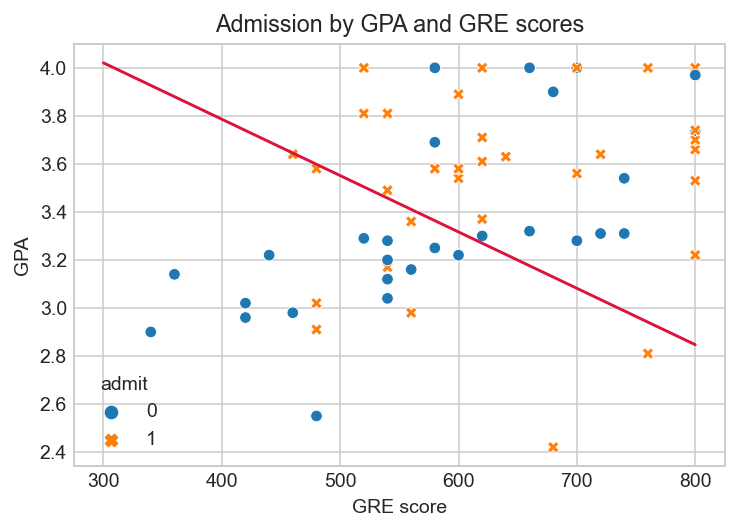

In [ ]:
#------------------------
# Create plot
#------------------------

# Create list of points to plot for the decision boundary
#---------------------
x_1 = np.linspace(300, 800, 100)
x_2 = -1/theta2*(theta0 + theta1*x_1)

# Make figure size
fig = plt.figure(dpi = 140)

# Plot df data and decision boundary
#---------------------
sns.scatterplot(data = dfAdmissions, x = 'gre', y = 'gpa', hue = 'admit', style = 'admit', legend=True)
plt.plot(x_1, x_2, marker = '', color = 'crimson', label = 'Decision boundary')

# Label figure
plt.xlabel('GRE score')
plt.ylabel('GPA')
plt.title('Admission by GPA and GRE scores')

# Uncommment to save figure
#---------------------
plt.savefig('admissionDecisionBoundary.pdf', bbox_inches='tight', dpi= 300)

# Show the plot
#---------------------
plt.show()